
Download and extract files
https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset

In [2]:
import zipfile

zip_path = r"..\..\data\raw\Dog_standford.zip"  

extract_path = r"..\..\data\raw"  

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)


# Data exploration 


In [3]:
import os

#list_breed_folders: contain a list of breeds
#for each breed: contain a list of images
#-----------------------------------------
#list_annotation_folders: contain a list of breeds
#for each breed: contain a list of annotations

list_image_folder_paths = os.path.join(extract_path, 'images\Images')


list_breed_folders = os.listdir(list_image_folder_paths)


list_annotation_folder_paths = os.path.join(extract_path, 'annotations\Annotation')

list_annotation_folders = os.listdir(list_annotation_folder_paths)

print(f"List Breed Folders: {list_breed_folders}")
print("\n")
print(f"List Annotation Folder: {list_annotation_folders}")



List Breed Folders: ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n

In [4]:
from PIL import Image
# lists contain all the images/ annotation files 
list_images =[]
list_annotations=[]

#path for vissualize/read xml files
list_image_paths=[]
list_ann_paths=[]

# list image size
list_image_sizes=[]

# append all image
for folder in list_breed_folders:
    folder_path= os.path.join(extract_path,'images\Images',folder)
    tmp_list_img_path = os.listdir(folder_path) # This only contains 1 breed at 1 loop

    for img in tmp_list_img_path:
        img_path = os.path.join(folder_path, img)
        list_images.append(img)
        list_image_paths.append(img_path)
        
        # Get size of image
        with Image.open(img_path) as image:
            list_image_sizes.append(image.size)  # return (width, height)
        
# append all annotation files
for folder in list_annotation_folders:
    folder_path= os.path.join(extract_path,'annotations\Annotation',folder)
    tmp_list_ann_path = os.listdir(folder_path) # This only contains 1 breed at 1 loop
    
    for ann in tmp_list_ann_path:
        list_annotations.append(ann)
        
        # Store all the ann paths for long-term using
        list_ann_paths.append(os.path.join(folder_path,ann))
        
print(f"A sample in List image names: {list_images[0]}")
print(f"A sample in List annotation files: {list_annotations[0]}")
print(f"A sample in List Image Paths: {list_image_paths[0]}")
print(f"A sample in List Annotation Paths: {list_ann_paths[0]}")



A sample in List image names: n02085620_10074.jpg
A sample in List annotation files: n02085620_10074
A sample in List Image Paths: ..\..\data\raw\images\Images\n02085620-Chihuahua\n02085620_10074.jpg
A sample in List Annotation Paths: ..\..\data\raw\annotations\Annotation\n02085620-Chihuahua\n02085620_10074


# Check for image/ XML files

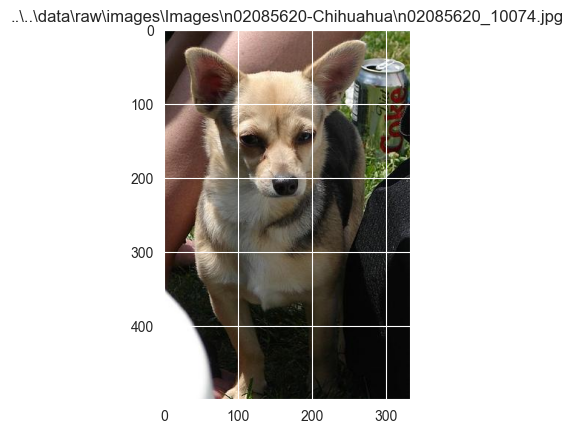

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
# import numpy as np

# Vissualize image and print a sample folder
img = Image.open(list_image_paths[0])
plt.imshow(img)
plt.title(list_image_paths[0])
plt.show()

In [6]:
# Check for XML file
import xml.etree.ElementTree as ET

print("Details of an Annotation file: \n")
tree = ET.parse(list_ann_paths[0])
ET.dump(tree)



Details of an Annotation file: 

<annotation>
	<folder>02085620</folder>
	<filename>n02085620_10074</filename>
	<source>
		<database>ImageNet database</database>
	</source>
	<size>
		<width>333</width>
		<height>500</height>
		<depth>3</depth>
	</size>
	<segment>0</segment>
	<object>
		<name>Chihuahua</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>25</xmin>
			<ymin>10</ymin>
			<xmax>276</xmax>
			<ymax>498</ymax>
		</bndbox>
	</object>
</annotation>


# Check number, size of data

In [7]:
import numpy as np

# Check for number of breeds
num_breeds = len(list_breed_folders)
print(f"The number of breeds is :{num_breeds} \n")

# Check for number of images
num_images = len(list_images)

dic_breed_count = {}
for breed_folder in list_breed_folders:
    folder_path = os.path.join(list_image_folder_paths, breed_folder)
    dic_breed_count[breed_folder] = len(os.listdir(folder_path))
    
# print the number of image for each breed in a table format
print(f"{'Breed':<40} {'Number of Images':<20} {'Total Number of Breeds':<25}")
print('-' * 85)
first_row = True
for breed, count in dic_breed_count.items():
    if first_row:
        print(f"{breed:<40} {count:<20} {num_breeds:<25}")
        first_row = False
    else:
        print(f"{breed:<40} {count:<20} {'':<25}")
        
        


The number of breeds is :120 

Breed                                    Number of Images     Total Number of Breeds   
-------------------------------------------------------------------------------------
n02085620-Chihuahua                      152                  120                      
n02085782-Japanese_spaniel               185                                           
n02085936-Maltese_dog                    252                                           
n02086079-Pekinese                       149                                           
n02086240-Shih-Tzu                       214                                           
n02086646-Blenheim_spaniel               188                                           
n02086910-papillon                       196                                           
n02087046-toy_terrier                    172                                           
n02087394-Rhodesian_ridgeback            172                                           
n02

In [8]:
# Calculate the average image size
img_size = np.array(list_image_sizes)
print(f'Average image size: {img_size.mean(axis=0)}')

Average image size: [442.53187561 385.86122449]


# Box plot of the data

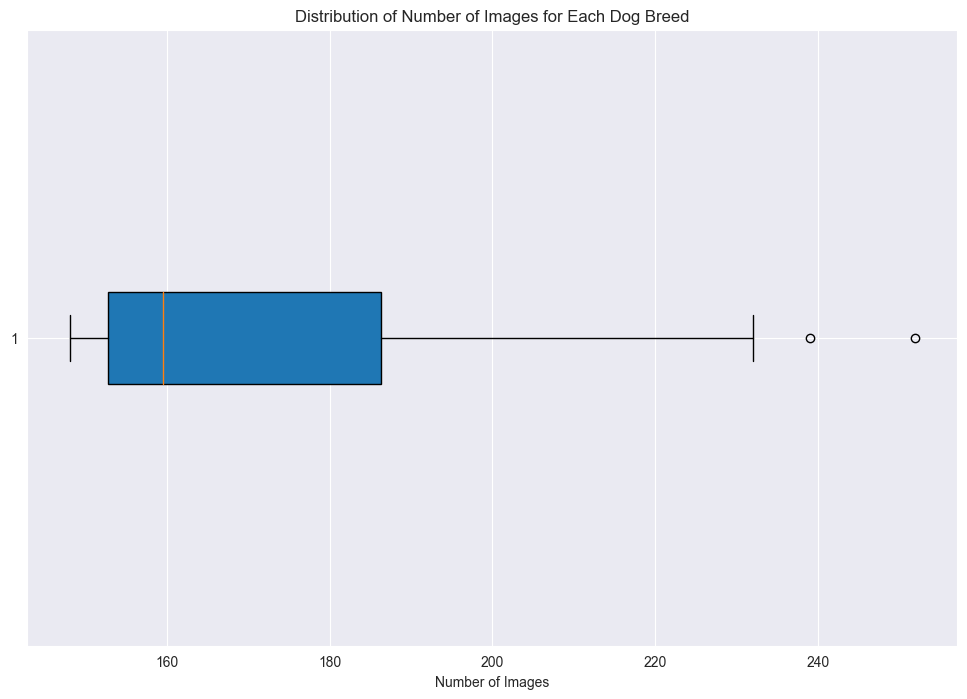

In [9]:
image_counts = list(dic_breed_count.values())

# box plot
plt.figure(figsize=(12, 8))
plt.boxplot(image_counts, vert=False, patch_artist=True)
plt.xlabel('Number of Images')
plt.title('Distribution of Number of Images for Each Dog Breed')
plt.show()

# Histogram of the data

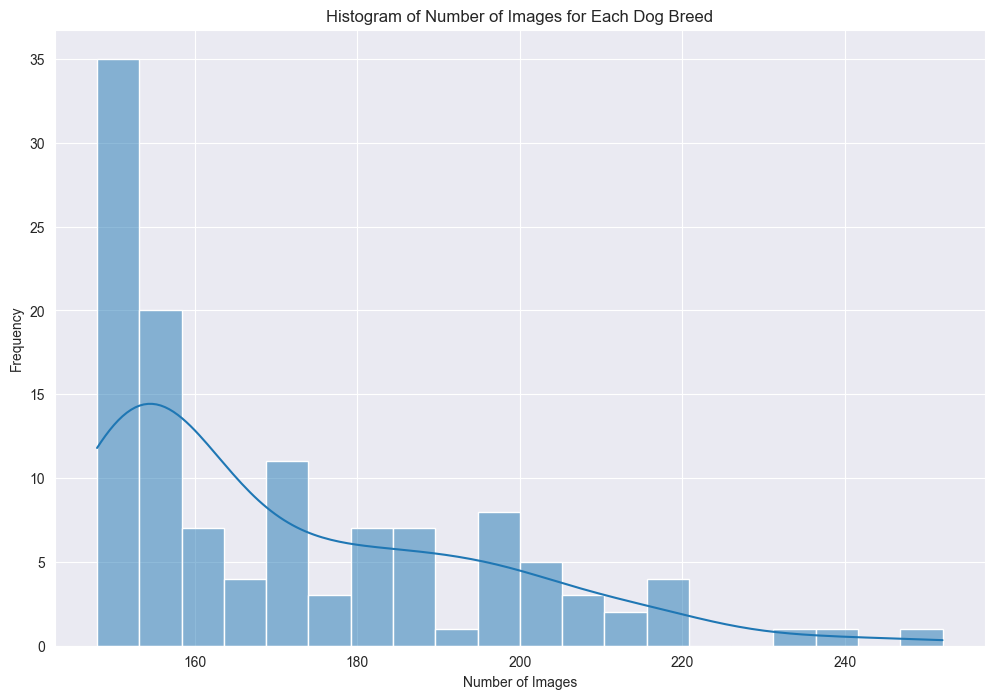

In [10]:
import seaborn as sns
#  histogram
plt.figure(figsize=(12, 8))
sns.histplot(image_counts, bins=20, kde=True)
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Images for Each Dog Breed')
plt.show()

# Find missing data

In [11]:
# Find missing value
missing_data_images = [img for img in list_image_paths if not os.path.exists(img)]
missing_data_annotations = [ann for ann in list_ann_paths if not os.path.exists(ann)]

print(f"Missing images: {len(missing_data_images)}")
print(f"Missing annotations: {len(missing_data_annotations)}")

# Handle missing value 
list_image_paths = [img for img in list_image_paths if os.path.exists(img)]
list_ann_paths = [ann for ann in list_ann_paths if os.path.exists(ann)]




Missing images: 0
Missing annotations: 0


# Check duplicate data

In [12]:
unique_image_paths = set(list_image_paths)
unique_ann_paths = set(list_ann_paths)

print(f"Unique images: {len(unique_image_paths)}")
print(f"Unique annotations: {len(unique_ann_paths)}")

# Handle duplicate data
list_image_paths = list(unique_image_paths)
list_ann_paths = list(unique_ann_paths)

Unique images: 20580
Unique annotations: 20580


# Distribute data by label

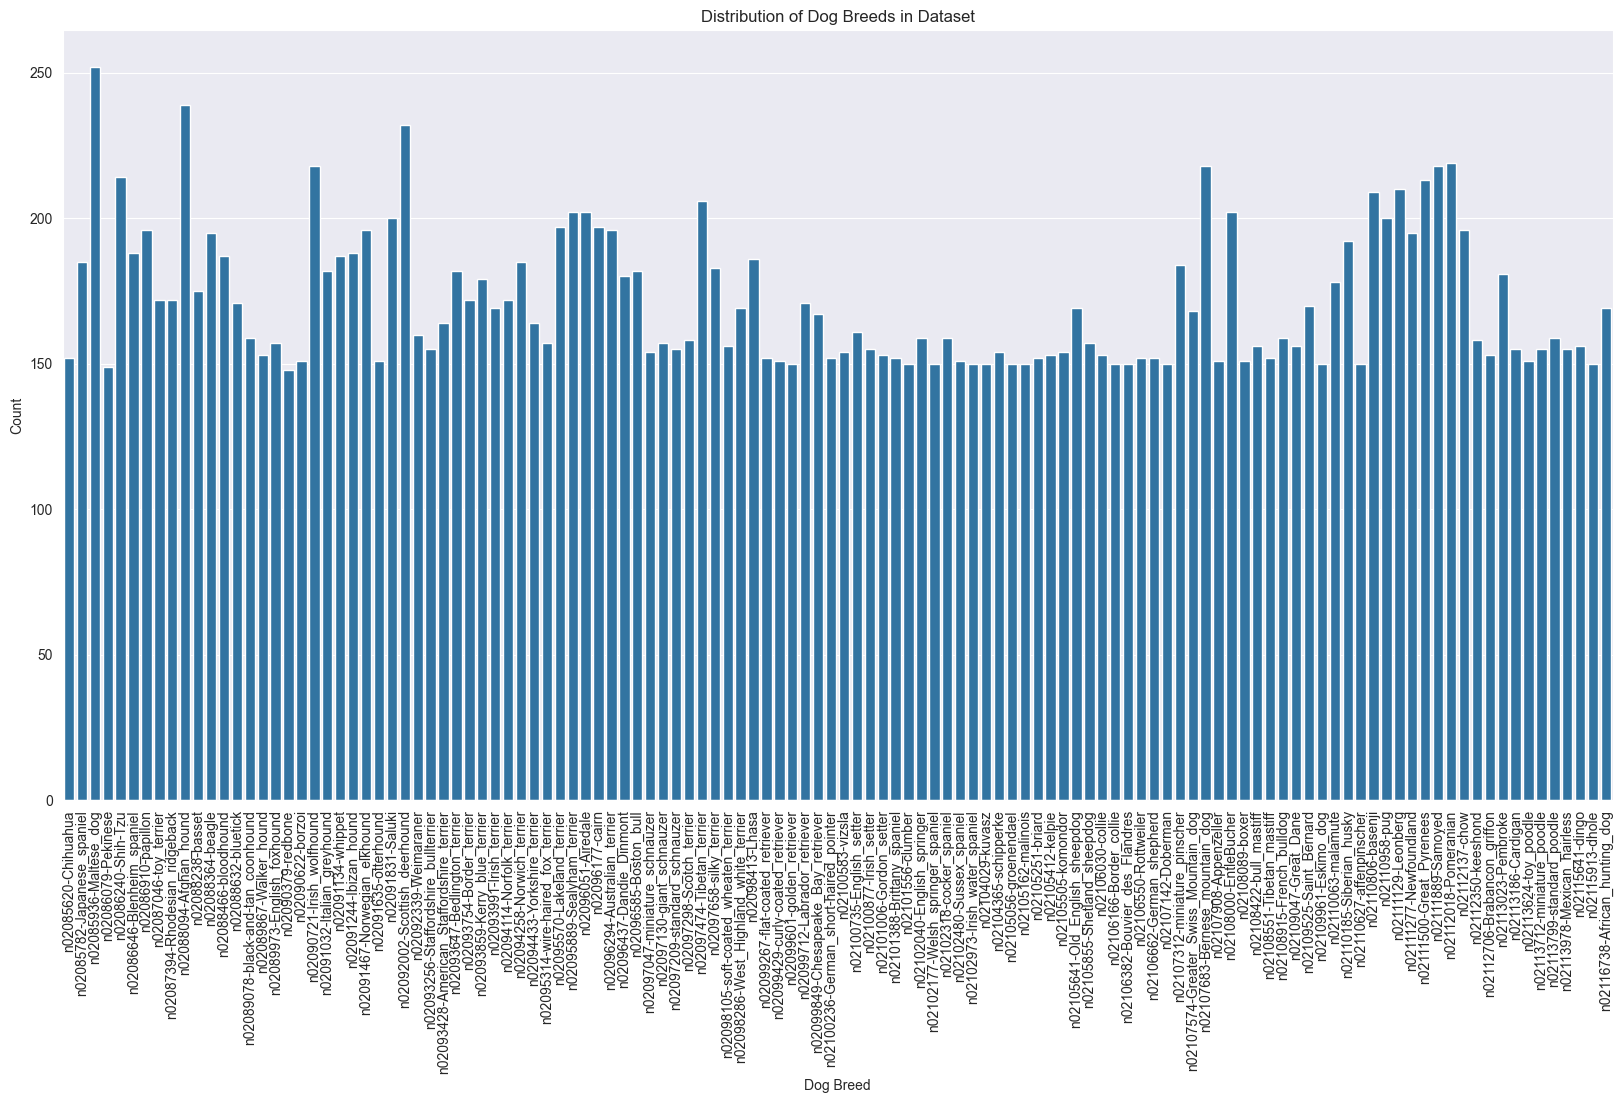

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sử dụng dic_breed_count để vẽ biểu đồ phân phối nhãn
plt.figure(figsize=(20,10))
sns.barplot(x=list(dic_breed_count.keys()), y=list(dic_breed_count.values()))
plt.xticks(rotation=90)
plt.title('Distribution of Dog Breeds in Dataset')
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.show()


# Annotation Data Analysis

Number of images in n02085620-Chihuahua: 152
Number of annotations in n02085620-Chihuahua: 152


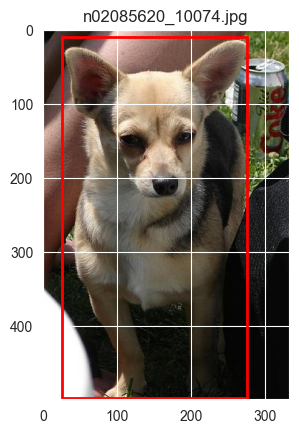

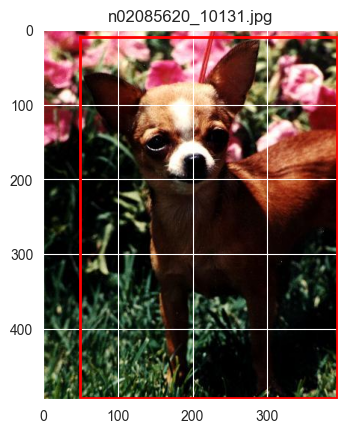

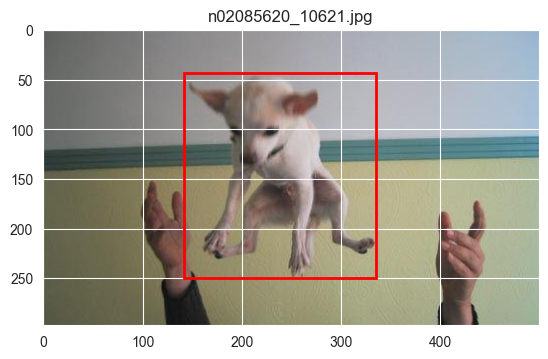

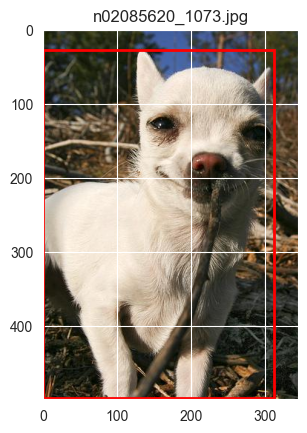

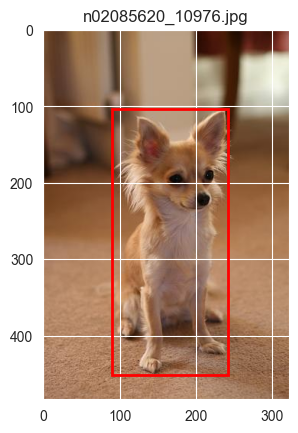

In [17]:
import matplotlib.patches as patches

image_folder = os.path.join(extract_path, 'images/Images')
annotation_folder = os.path.join(extract_path, 'annotations/Annotation')

list_breed_folders = os.listdir(image_folder)

# Iterate through each breed folder
for breed_folder in list_breed_folders:
    image_breed_folder = os.path.join(image_folder, breed_folder)
    annotation_breed_folder = os.path.join(annotation_folder, breed_folder)
    
    # Get the list of image and annotation files
    image_files = os.listdir(image_breed_folder)
    annotation_files = os.listdir(annotation_breed_folder)
    
    # Sort the lists to ensure correct matching
    image_files.sort()
    annotation_files.sort()
    
    # Check the number of files
    print(f"Number of images in {breed_folder}: {len(image_files)}")
    print(f"Number of annotations in {breed_folder}: {len(annotation_files)}")
    
    # Display the first 5 images and their bounding boxes
    for img_file, ann_file in zip(image_files[:5], annotation_files[:5]):
        img_path = os.path.join(image_breed_folder, img_file)
        ann_path = os.path.join(annotation_breed_folder, ann_file)
        
        img = Image.open(img_path)
        tree = ET.parse(ann_path)
        root = tree.getroot()
        
        bbox = root.find('object').find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        
        fig, ax = plt.subplots(1)
        ax.imshow(img)
        
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
        plt.title(img_file)
        plt.show()

    # Stop after displaying the first 5 images of the first folder
    break

# Check the size of the bounding boxes

              Width        Height
count  20580.000000  20580.000000
mean     289.040671    297.629932
std      128.577818    119.853244
min       32.000000     38.000000
25%      200.000000    220.000000
50%      279.000000    291.000000
75%      362.000000    357.000000
max     2735.000000   2025.000000


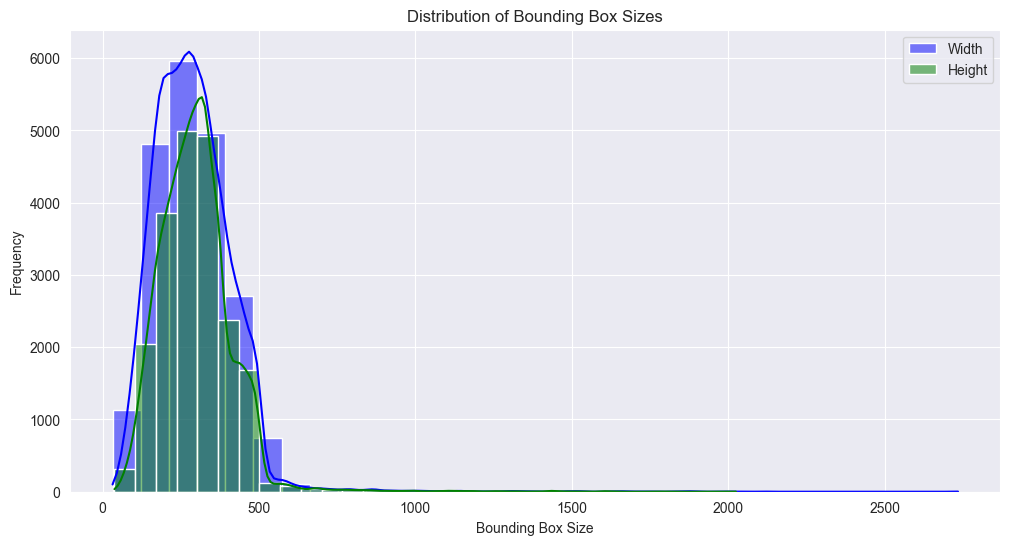

In [18]:
import pandas as pd

# calculating bounding box sizes
bbox_sizes = []
for ann_path in list_ann_paths:
    tree = ET.parse(ann_path)
    root = tree.getroot()
    
    bbox = root.find('object').find('bndbox')
    xmin = int(bbox.find('xmin').text)
    ymin = int(bbox.find('ymin').text)
    xmax = int(bbox.find('xmax').text)
    ymax = int(bbox.find('ymax').text)
    
    width = xmax - xmin
    height = ymax - ymin
    bbox_sizes.append((width, height))

# Create a DataFrame for better analysis
bbox_df = pd.DataFrame(bbox_sizes, columns=['Width', 'Height'])

# Display basic statistics
print(bbox_df.describe())

# Plot the distribution of bounding box sizes
plt.figure(figsize=(12, 6))
sns.histplot(bbox_df['Width'], kde=True, bins=30, color='blue', label='Width')
sns.histplot(bbox_df['Height'], kde=True, bins=30, color='green', label='Height')
plt.xlabel('Bounding Box Size')
plt.ylabel('Frequency')
plt.title('Distribution of Bounding Box Sizes')
plt.legend()
plt.show()


# Correlation Analysis (Widht/ Height)

Correlation matrix:
            Width    Height
Width   1.000000  0.637698
Height  0.637698  1.000000


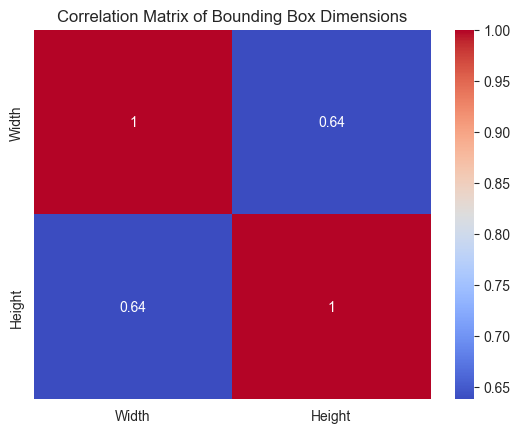

In [19]:

correlation = bbox_df.corr()
print("Correlation matrix:\n", correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Bounding Box Dimensions')
plt.show()


The number of breeds is :120 

Breed                                    Number of Images     Total Number of Breeds   
-------------------------------------------------------------------------------------
n02085620-Chihuahua                      152                  120                      
n02085782-Japanese_spaniel               185                                           
n02085936-Maltese_dog                    252                                           
n02086079-Pekinese                       149                                           
n02086240-Shih-Tzu                       214                                           
n02086646-Blenheim_spaniel               188                                           
n02086910-papillon                       196                                           
n02087046-toy_terrier                    172                                           
n02087394-Rhodesian_ridgeback            172                                           
n02

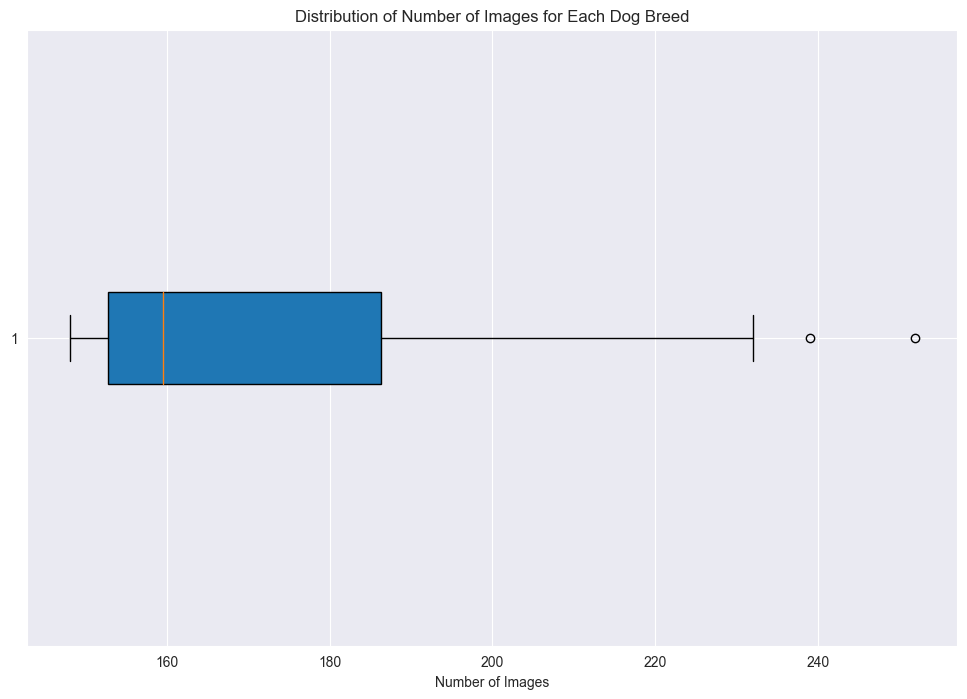

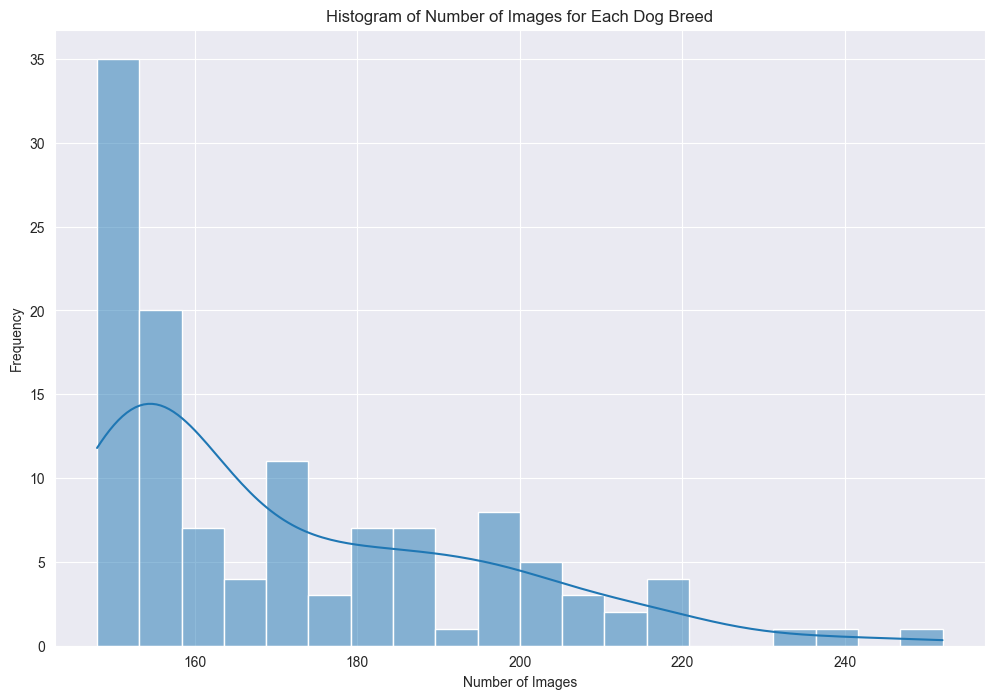

In [20]:
import numpy as np

# Check for number of breeds
num_breeds = len(list_breed_folders)
print(f"The number of breeds is :{num_breeds} \n")

# Check for number of images
num_images = len(list_images)

dic_breed_count = {}
for breed_folder in list_breed_folders:
    folder_path = os.path.join(list_image_folder_paths, breed_folder)
    dic_breed_count[breed_folder] = len(os.listdir(folder_path))
    
# print the number of image for each breed in a table format
print(f"{'Breed':<40} {'Number of Images':<20} {'Total Number of Breeds':<25}")
print('-' * 85)
first_row = True
for breed, count in dic_breed_count.items():
    if first_row:
        print(f"{breed:<40} {count:<20} {num_breeds:<25}")
        first_row = False
    else:
        print(f"{breed:<40} {count:<20} {'':<25}")
        
# Calculate the average image size
img_size = np.array(list_image_sizes)
print(f'Average image size: {img_size.mean(axis=0)}')

image_counts = list(dic_breed_count.values())

# box plot
plt.figure(figsize=(12, 8))
plt.boxplot(image_counts, vert=False, patch_artist=True)
plt.xlabel('Number of Images')
plt.title('Distribution of Number of Images for Each Dog Breed')
plt.show()

# histogram
plt.figure(figsize=(12, 8))
sns.histplot(image_counts, bins=20, kde=True)
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Images for Each Dog Breed')
plt.show()
